# **Importing the necessary libraries**

In [ ]:
!pip install transformers

In [ ]:
!pip install google-api-python-client

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from transformers import RobertaTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import TFRobertaModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import nltk
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# Loading the datasets

In [ ]:
df_train = pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")

In [ ]:
df_test = pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv")

In [ ]:
df_train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df_test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


# **Checking for any NULL values in the dataset**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


# **Positive and negative sentimental percentage in the train dataset**

In [ ]:
pos = 100*len(df_train.loc[df_train['label']==0,'label'])/len(df_train['label'])
neg = 100*len(df_train.loc[df_train['label']==1,'label'])/len(df_train['label'])

In [ ]:
print(pos)
print(neg)

92.98542018647143
7.014579813528565


# **Data Visualisation**

In [ ]:
train_len = df_train['tweet'].str.len()
test_len = df_test['tweet'].str.len()

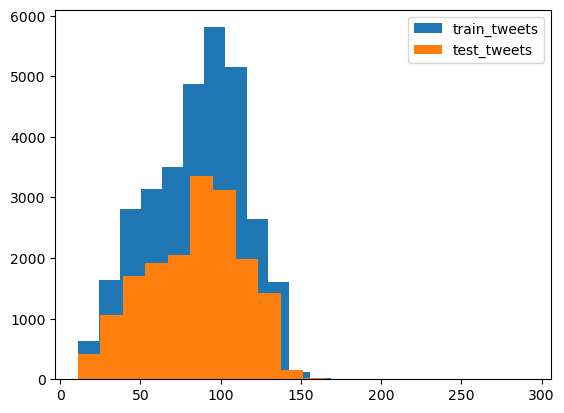

In [ ]:
plt.hist(train_len, bins=20,label='train_tweets')
plt.hist(test_len , bins=20, label='test_tweets')
plt.legend()
plt.show()

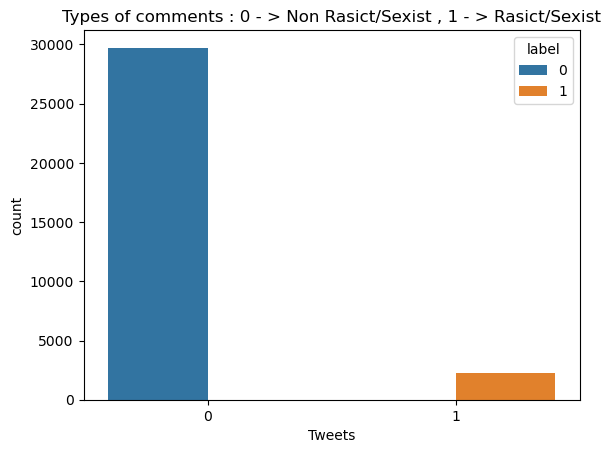

In [ ]:
sns.countplot(data=df_train, x='label', hue='label')
plt.title('Types of comments : 0 - > Non Rasict/Sexist , 1 - > Rasict/Sexist')
plt.xlabel('Tweets')
plt.show()

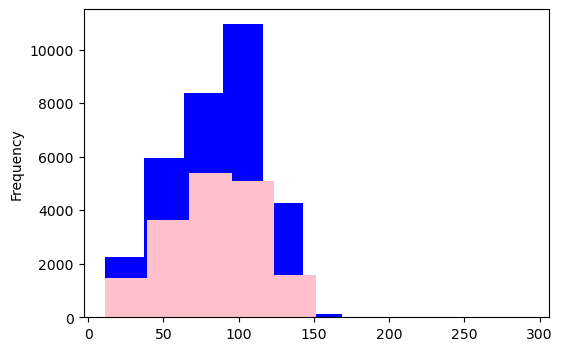

In [ ]:
length_train = df_train['tweet'].str.len().plot.hist(color = 'blue', figsize = (6, 4))
length_test = df_test['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

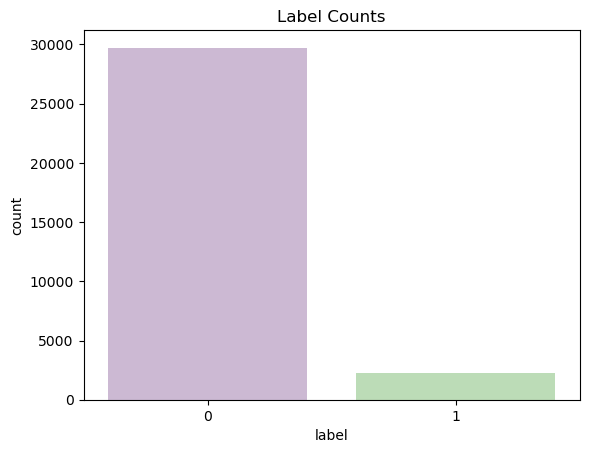

In [ ]:
sns.countplot(x= 'label',data = df_train,palette="PRGn")
plt.title('Label Counts')
plt.show()

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
wordcloud_mask=np.array(Image.open("/kaggle/input/wodcloud-twiter-pic/twitter.png"))

# Racist-Sexist-Data Wordcloud

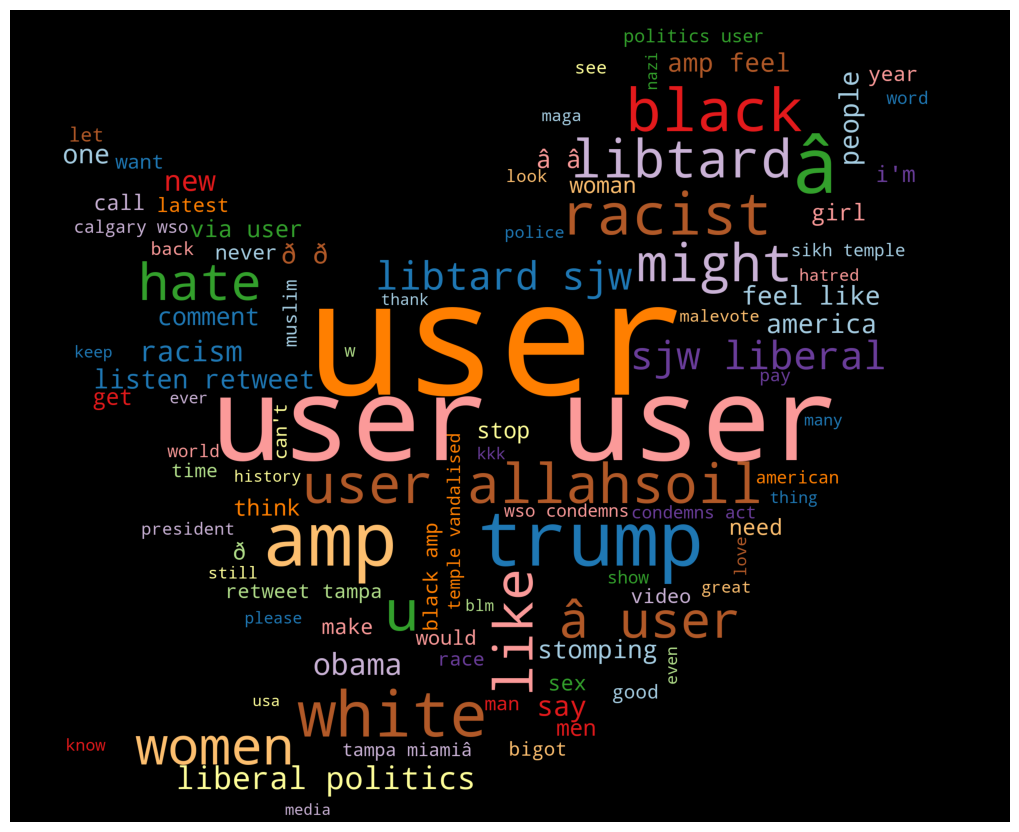

In [ ]:
racist_sexist_data=df_train[df_train.label==1]
racist_tweet_text=" ".join(racist_sexist_data["tweet"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stop_words,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='Paired').generate(racist_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# Positive Data Wordcloud

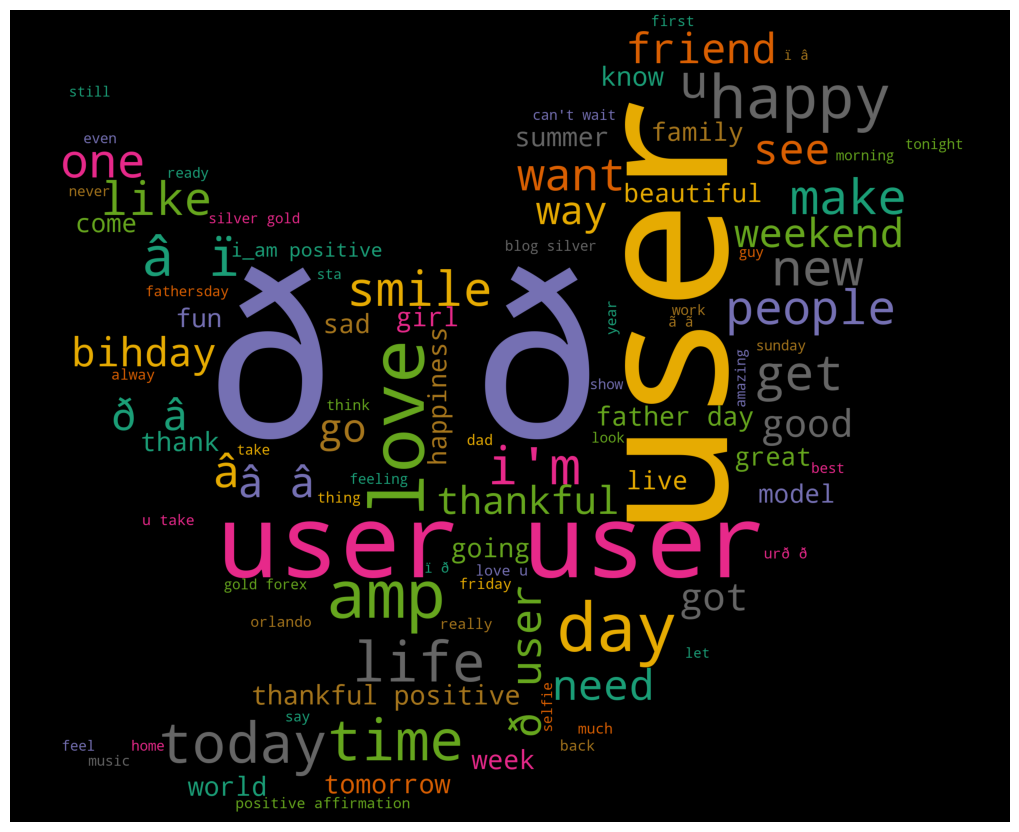

In [ ]:
positive_data=df_train[df_train.label==0]
positive_tweet_text=" ".join(positive_data["tweet"].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(stopwords=stop_words,width=1600,height=800,max_words=100,mask=wordcloud_mask,colormap='Dark2').generate(positive_tweet_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

# **Data Pre-processing and Cleaning**

In [ ]:
Word = WordNetLemmatizer()

In [ ]:
def clean(raw): #Hyperlink and markup removal
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result) # greater than sign
    result = re.sub('&#x27;', "'", result) # apostrophe
#     result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result) # paragraph tag
    result = re.sub('<i>', ' ', result) #italics tag
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub("\n", '', result) # newline
    return result

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', text)
    return text

In [ ]:
def lower_case(df_train):
    df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
def stop_words_remove(df):
    df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
def remove_word_user(df):
    df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x != 'user'))

In [ ]:
def lemmatize(df):
    df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join([Word.lemmatize(word) for word in x.split()]))

In [ ]:
def cleaning(df_train):
    df_train['tweet'] = df_train['tweet'].apply(clean)
    df_train['tweet'] = df_train['tweet'].apply(deEmojify)
    df_train['tweet'] = df_train['tweet'].apply(lambda x: remove_punct(x))
    lower_case(df_train)
    stop_words_remove(df_train)
    remove_word_user(df_train)
#     rare_words_removal(df)
#     spell_correction(df)
    lemmatize(df_train)

In [ ]:
cleaning(df_train)

In [ ]:
df_train

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening sad song monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


In [ ]:
df_train.drop("id",axis=1)

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwave trying wrap mantle gen...
31959,0,listening sad song monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [ ]:
max_len=128
text_data=df_train["tweet"]
label_data=df_train["label"]

In [ ]:
print("Length of Text Data :",len(text_data))
print("Length of Label Data :",len(label_data))

Length of Text Data : 31962
Length of Label Data : 31962


# RoBERTa tokenizer

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# RoBERTa model

In [ ]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
final_text_data=df_train["tweet"]
final_label_data=np.array(label_data)

# Encoding the input text to id's and attention masks

In [ ]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]

    for i in range(len(final_text_data)):
        encode_data=roberta_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2352: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,final_label_data.shape))

Text Input Ids Shape (31962, 128) 
Text Input Attention Mask Shape (31962, 128) 
Label Data shape (31962,)


In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,final_label_data,text_attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (25569, 128)
Test input shape (6393, 128)
Train label shape (25569,)
Test label shape (6393,)
Train attention mask shape (25569, 128)
Test attention mask shape (6393, 128)


# Creating the RoBERTa model

In [ ]:
def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")

    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]

    dense_layer = tf.keras.layers.Dense(128, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.5)(dense_layer)
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)

    return model

In [ ]:
model=Create_Roberta_Model()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

optimizer = tf.keras.optimizers.Adam(lr=1e-5)

model.compile(loss=loss,optimizer=optimizer, metrics=["accuracy"])

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=42,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/10
609/609 [==============================] - 720s 1s/step - loss: 0.2834 - accuracy: 0.9284 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoch 2/10
609/609 [==============================] - 697s 1s/step - loss: 0.2665 - accuracy: 0.9301 - val_loss: 0.2577 - val_accuracy: 0.9287
Epoch 3/10
609/609 [==============================] - 698s 1s/step - loss: 0.2653 - accuracy: 0.9301 - val_loss: 0.2574 - val_accuracy: 0.9287
Epoch 4/10
609/609 [==============================] - 698s 1s/step - loss: 0.2614 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 5/10
609/609 [==============================] - 697s 1s/step - loss: 0.2599 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 6/10
609/609 [==============================] - 697s 1s/step - loss: 0.2591 - accuracy: 0.9302 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/10
609/609 [==============================] - 698s 1s/step - loss: 0.2576 - accuracy: 0.9301 - val_loss: 0.2572 - val_accuracy: 0.9287

# Evalutation metrics

In [ ]:
def model_loss_and_accuracy(history):

    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="o",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="D",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()


    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="v",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="s",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

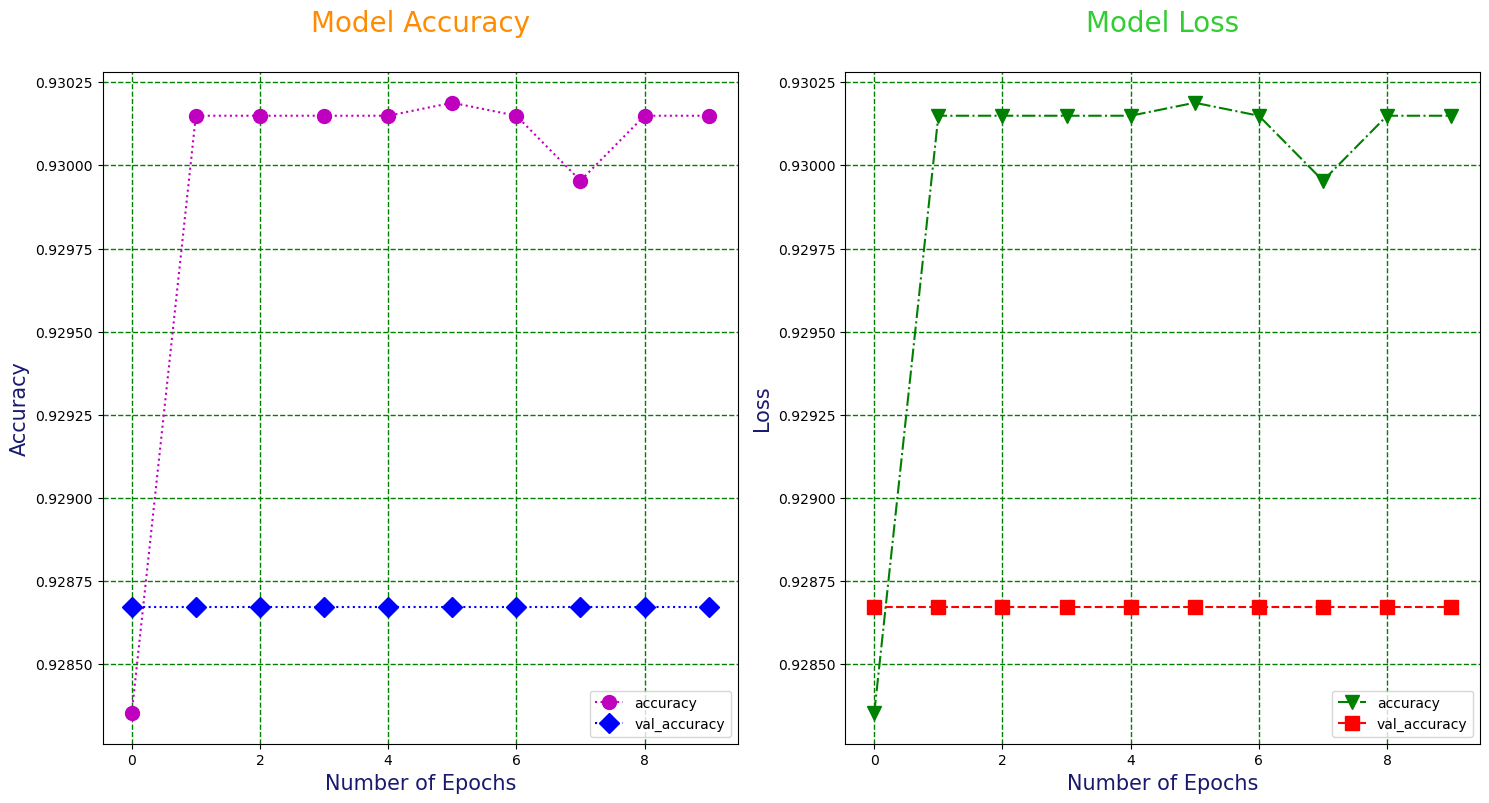

In [ ]:
model_loss_and_accuracy(history)

# Label Names

In [ ]:
label_name=["Positive","Racist and Sexist"]
pred=model.predict([X_test_input, test_mask])
prediction=np.argmax(pred, axis=1)

200/200 [==============================] - 57s 269ms/step


# Accuracy Score

In [ ]:
print("Accuracy Score is",accuracy_score(Y_test_label,prediction))

Accuracy Score is 0.9286719849835758


# ROC-AUC score

In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(Y_test_label, pred[:,1])))

ROC AUC Score is 0.5167748198186218


# ROC curve

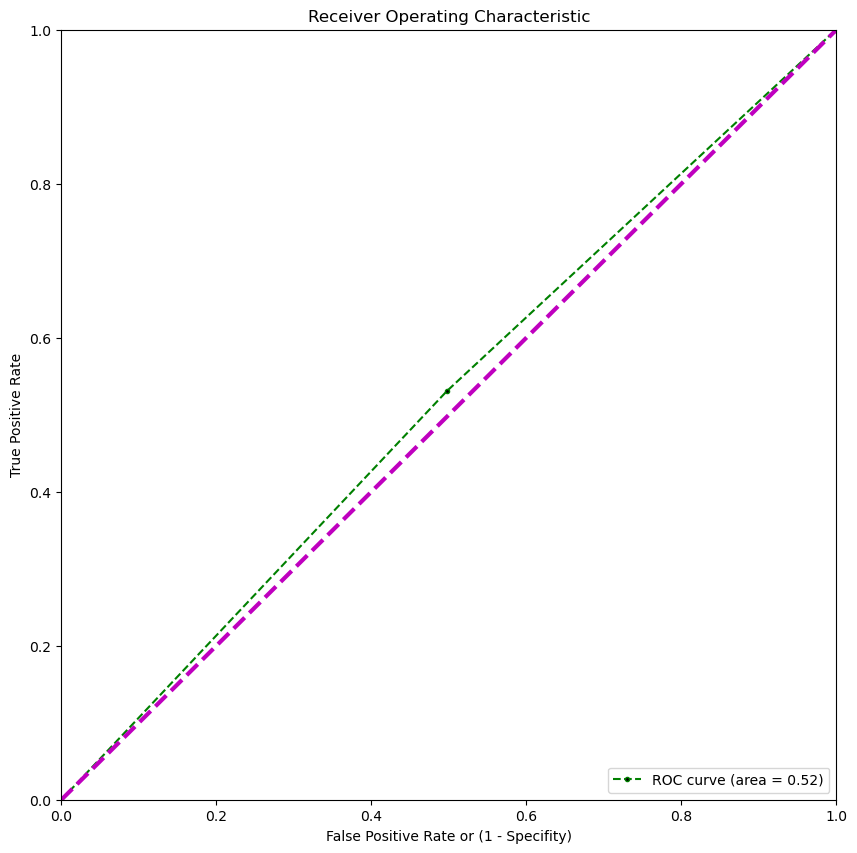

In [ ]:
pred_positive = pred[:,1]
fpr, tpr, thresholds = roc_curve(Y_test_label, pred_positive)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color="g",linestyle="--",marker="o",markersize=3,markerfacecolor="k")

plt.plot([0, 1], [0, 1],linestyle="--",linewidth=3,color="m")  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Other Classifier models**

# Splitting the original data

In [ ]:
X = df_train.drop(columns=['label'])
y = df_train['label']
test = df_test
print(X.shape, test.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31962, 2) (17197, 2) (31962,)
(25569, 2) (6393, 2) (25569,) (6393,)


# Tokenization and Vectorization

In [ ]:
def tokenize_and_clean(text):
    # Tokenization
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if re.match(r'\w{1,}', token)]

    # Stemming
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in filtered_tokens if token not in stop_words]
    return stems

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_clean)
X_train_tweets_tfidf = tfidf_vectorizer.fit_transform(X_train['tweet'])
X_test_tweets_tfidf = tfidf_vectorizer.transform(X_test['tweet'])
print(X_train_tweets_tfidf.shape, X_test_tweets_tfidf.shape)

# TF-IDF Vectorization on full training data
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_clean)
X_tweets_tfidf = tfidf_vectorizer.fit_transform(X['tweet'])
test_tweets_tfidf = tfidf_vectorizer.transform(test['tweet'])
print(X_tweets_tfidf.shape, test_tweets_tfidf.shape)

(25569, 28706) (6393, 28706)
(31962, 33246) (17197, 33246)


# SMOTE

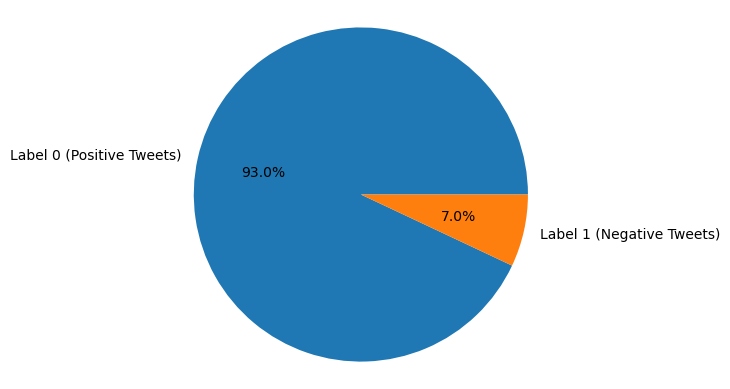

In [ ]:
plt.pie(y_train.value_counts(),
        labels=['Label 0 (Positive Tweets)', 'Label 1 (Negative Tweets)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

(47560, 28706) (47560,)
(59440, 33246) (59440,)


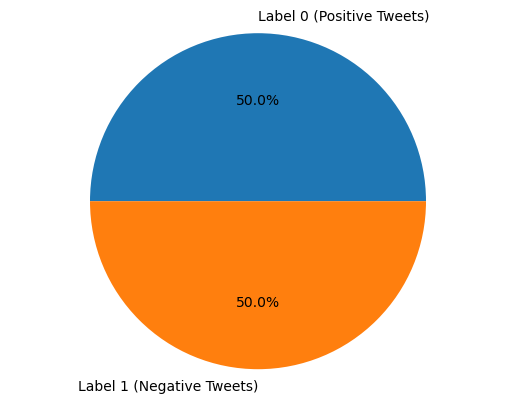

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_tweets_tfidf, y_train.values)
print(X_train_smote.shape, y_train_smote.shape)

# SMOTE on full training data
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_tweets_tfidf, y.values)
print(X_smote.shape, y_smote.shape)

# Class Imbalance Check
plt.pie(pd.value_counts(y_train_smote),
        labels=['Label 0 (Positive Tweets)', 'Label 1 (Negative Tweets)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

# Training various Classifiers

In [ ]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: Accuracy={acc}, F1-Score={f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: Accuracy={acc}, F1-Score={f1}')

**Logistic Regression**

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
y_train_pred = lr.predict(X_train_smote)
y_test_pred = lr.predict(X_test_tweets_tfidf)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores: Accuracy=0.971, F1-Score=0.972
Validation Scores: Accuracy=0.919, F1-Score=0.585


**Naive Bayes Classifier**

In [ ]:
# Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)
y_train_pred = mnb.predict(X_train_smote)
y_test_pred = mnb.predict(X_test_tweets_tfidf)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores: Accuracy=0.964, F1-Score=0.965
Validation Scores: Accuracy=0.924, F1-Score=0.612


**Random Forest Classifier**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_train_pred = rf.predict(X_train_smote)
y_test_pred = rf.predict(X_test_tweets_tfidf)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores: Accuracy=1.0, F1-Score=1.0
Validation Scores: Accuracy=0.961, F1-Score=0.697


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_smote, y_train_smote)
y_train_pred = svm.predict(X_train_smote)
y_test_pred = svm.predict(X_test_tweets_tfidf)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores: Accuracy=0.987, F1-Score=0.987
Validation Scores: Accuracy=0.919, F1-Score=0.563
